In [1]:
import pandas as pd
df = pd.read_csv('enron_cleaned.csv', index_col=0)

In [2]:
df.shape

(251734, 10)

In [3]:
df.tail(1)

,text,headers,subject,messageId,priority,from,to,date,cc,bcc
251733,\nMessage sent from the pjm-customer-info mail...,{'message-id': '<3128775.1075858652805.JavaMai...,PJM's President Calls on Congress To Strengthe...,3128775.1075858652805.JavaMail.evans@thyme,normal,pjmcustomerrelationsandtraining@pjm.com,pjm-customer-info@risc1.pjm.com,2001-10-10T18:09:27.000Z,NaN,NaN


In [4]:
df.iloc[[111]][['from', 'to', 'cc', 'bcc']]

,from,to,cc,bcc
111,asem.atta@enron.com,cara.semperger@enron.com corry.bentley@enron.com,duong.luu@enron.com will.smith@enron.com vishw...,duong.luu@enron.com will.smith@enron.com vishw...


In [5]:
na_values = {'from': " ", "to": " ", "cc": " ", "bcc": " "}
df = df.fillna(value=na_values)

In [6]:
df['all'] = df[['from', 'to', 'cc', 'bcc']].agg(' '.join, axis=1)

In [7]:
all_emails_address = set()
for email in df['all'].values:
    all_emails_address.update(email.split())

In [8]:
df[df['text'].str.contains('(?i)raptor')].shape

(355, 11)

In [9]:
what_we_need = {'tim.belden@enron.com', 'andrew.fastow@enron.com', 'ben.glisan@enron.com', 'david.delainey@enron.com', 'mark.koenig@enron.com', 'richard.causey@enron.com', 'tim.despain@enron.com'}

# Network Analysis

## Step 1: Find emails of key executives

Kenneth Lay, founder, Chairman and CEO

Jeffrey Skilling, former President, and COO

Andrew Fastow, former CFO

Ben Glisan: https://www.nytimes.com/2006/01/29/business/businessspecial3/10-enron-players-where-they-landed-after-the-fall.html

In [10]:
jeff = set(x for x in all_emails_address if 'jeff' in x and 'skill' in x)

In [11]:
ken = set(x for x in all_emails_address if 'ken' in x and 'lay' in x)

In [12]:
andrew = set(x for x in all_emails_address if 'and' in x and 'fas' in x)

In [13]:
ben = set(x for x in all_emails_address if 'ben' in x and 'gli' in x)

In [14]:
print(jeff, ken, andrew, ben)

{'jeffrey.skilling@enron.com', 'jeffrey.k.skilling@enron.com', 'jeff.skilling@enron.com', 'jeff_skilling@enron.com', 'jeffreyskilling@yahoo.com'} {'kenneth_lay@enron.net', 'ken.lay-@enron.com', 'ken.lay@enron.com', 'ssskenneth.lay@enron.com', 'ken_lay@enron.net', 'kenneth.l.lay@enron.com', 'lay.kenneth@enron.com', 'ken.lay-.chairman.of.the.board@enron.com', 'kennethlay@enron.com', 'ken_lay@enron.com', 'kenlay@enron.com', 'kenneth.lay@enron.com', 'kenneth_lay@enron.com'} {'andrew.fastow@enron.com', 'bbrandfass@panalytix.com', 'andrew.fastow@ljminvestments.com', 'andy.fastow@enron.com', 'andrew.s.fastow@enron.com', 'sandrah@fastband.com', 'fastandcool51@yahoo.com'} {'ben.glisan@enron.com', "ben'.'glisan@enron.com", 'ben_f_glisan@enron.com'}


In [15]:
pois = jeff | ken | andrew | ben

In [16]:
pois = pois - {'ssskenneth.lay@enron.com', 'fastandcool51@yahoo.com',  'bbrandfass@panalytix.com', 'sandrah@fastband.com'}

In [17]:
len(pois)

24

In [18]:
print(pois)

{'kenneth_lay@enron.net', 'ken_lay@enron.net', 'lay.kenneth@enron.com', 'andrew.fastow@enron.com', 'andrew.fastow@ljminvestments.com', 'jeffrey.k.skilling@enron.com', 'kennethlay@enron.com', 'andrew.s.fastow@enron.com', 'kenneth.lay@enron.com', 'jeff_skilling@enron.com', 'jeffreyskilling@yahoo.com', 'ken.lay-@enron.com', 'ken.lay@enron.com', 'ken.lay-.chairman.of.the.board@enron.com', 'kenneth.l.lay@enron.com', 'ben.glisan@enron.com', 'jeffrey.skilling@enron.com', 'andy.fastow@enron.com', 'ken_lay@enron.com', 'jeff.skilling@enron.com', 'ben_f_glisan@enron.com', 'kenlay@enron.com', 'kenneth_lay@enron.com', "ben'.'glisan@enron.com"}


In [19]:
df['recipients'] = df[['to', 'cc', 'bcc']].agg(' '.join, axis=1)

In [20]:
emails_cleaned = df[['from', 'recipients']]

In [21]:
emails_cleaned.head(1)

,from,recipients
0,rika.imai@enron.com,john.forney@enron.com mike.carson@enron.com cl...


In [22]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [23]:
G = nx.MultiDiGraph()

In [24]:
for sender, recipients in emails_cleaned.values:
    recipients_list = recipients.split()
    for recipient in recipients_list:
        G.add_edge(sender, recipient)

In [25]:
print(len(all_emails_address))

87500


In [26]:
len(G.nodes())

87130

In [27]:
len(G.edges())

1616855

In [28]:
print(pois)

{'kenneth_lay@enron.net', 'ken_lay@enron.net', 'lay.kenneth@enron.com', 'andrew.fastow@enron.com', 'andrew.fastow@ljminvestments.com', 'jeffrey.k.skilling@enron.com', 'kennethlay@enron.com', 'andrew.s.fastow@enron.com', 'kenneth.lay@enron.com', 'jeff_skilling@enron.com', 'jeffreyskilling@yahoo.com', 'ken.lay-@enron.com', 'ken.lay@enron.com', 'ken.lay-.chairman.of.the.board@enron.com', 'kenneth.l.lay@enron.com', 'ben.glisan@enron.com', 'jeffrey.skilling@enron.com', 'andy.fastow@enron.com', 'ken_lay@enron.com', 'jeff.skilling@enron.com', 'ben_f_glisan@enron.com', 'kenlay@enron.com', 'kenneth_lay@enron.com', "ben'.'glisan@enron.com"}


In [29]:
unique_poi = set()
for poi in pois:
    for neighbour in G[poi]:
        if len(G[poi][neighbour]) >= 5:
            unique_poi.add(poi)
            unique_poi.add(neighbour)
print(len(unique_poi))

17


In [30]:
unique_poi - pois

{'christie.patrick@enron.com',
 'david.delainey@enron.com',
 'don.miller@enron.com',
 'eharris@insightpartners.com',
 'greg.whalley@enron.com',
 'j..kean@enron.com',
 'joannie.williamson@enron.com',
 'k..allen@enron.com',
 'kevin.hannon@enron.com',
 'l..wells@enron.com',
 'louise.kitchen@enron.com',
 'richard.shapiro@enron.com',
 'sherri.sera@enron.com'}

In [31]:
unique_poi & pois

{'andrew.fastow@enron.com',
 'ben.glisan@enron.com',
 'jeff.skilling@enron.com',
 'kenneth.lay@enron.com'}

In [32]:
print(len(unique_poi - pois))

13


In [33]:
print(unique_poi)

{'ben.glisan@enron.com', 'kenneth.lay@enron.com', 'andrew.fastow@enron.com', 'greg.whalley@enron.com', 'david.delainey@enron.com', 'richard.shapiro@enron.com', 'kevin.hannon@enron.com', 'j..kean@enron.com', 'christie.patrick@enron.com', 'sherri.sera@enron.com', 'jeff.skilling@enron.com', 'l..wells@enron.com', 'don.miller@enron.com', 'joannie.williamson@enron.com', 'k..allen@enron.com', 'eharris@insightpartners.com', 'louise.kitchen@enron.com'}


In [34]:
poi_emails = unique_poi

In [35]:
print(len(poi_emails))

17


In [35]:
G.remove_nodes_from(set(G.nodes()) - unique_poi)

In [36]:
from networkx.drawing.nx_agraph import graphviz_layout

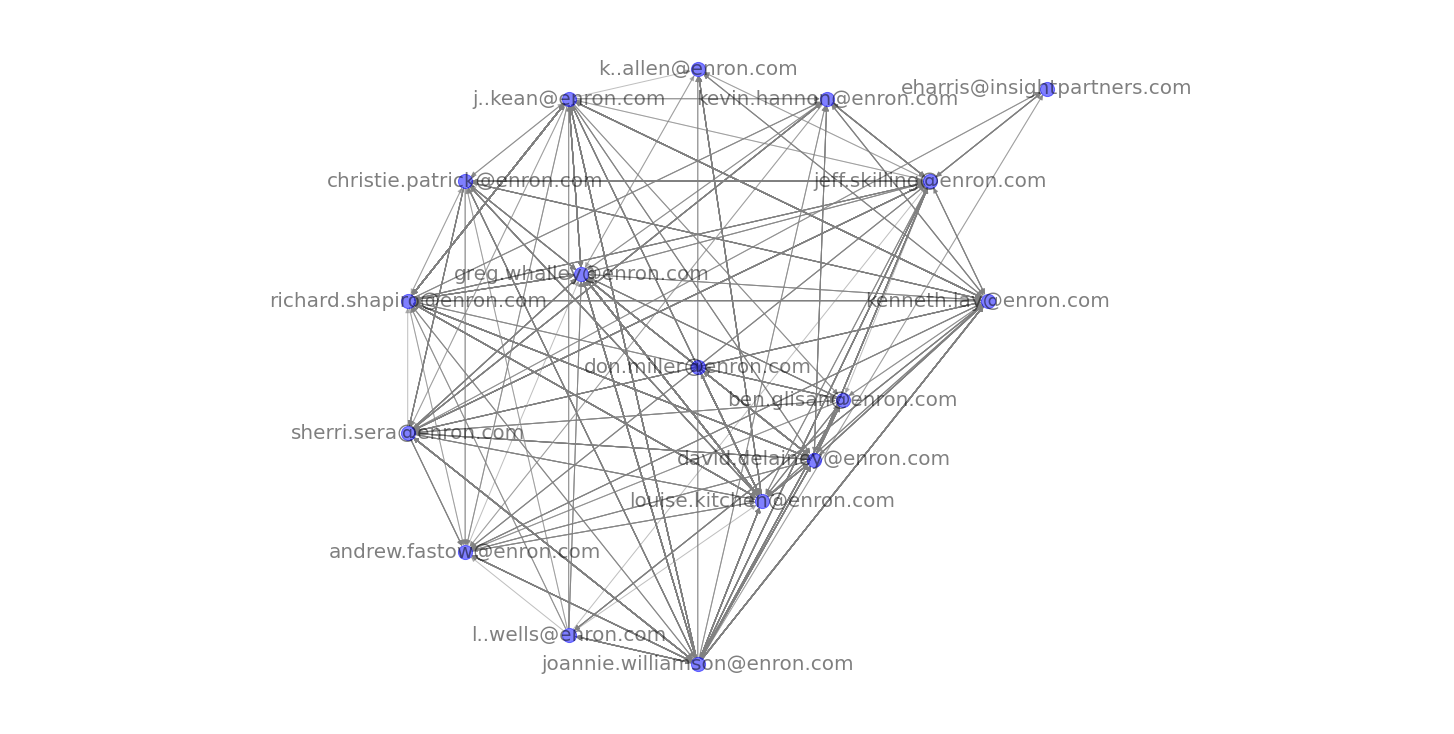

In [52]:
pos = graphviz_layout(G, prog="twopi", args="")
plt.figure(figsize=(20, 10))
nx.draw(G, pos, node_size=200, alpha=0.5, edge_color='grey', node_color="blue", with_labels=True, font_size=20)
plt.axis("equal")
# plt.show()
plt.savefig('POI.png')

### Topic Modeling

In [36]:
import pandas as pd
import numpy as np

In [37]:
data = df.copy()

email_text = data['text']
email_text

0         ---------------------- Forwarded by Rika Imai/...
1                                                     great
2         oohh la la.  who was your "friend"?  did you g...
3         \nAttached are the two files with this week's ...
4         lm:\nWhat are your thoughts going forward........
                                ...                        
251729    Here's a picture for you.  August 16th is my r...
251730               Version 2 is a shortened presentation.
251731    As some of you may be aware, there have been s...
251732    Stephen - Rick Shapiro has revised his allocat...
251733    \nMessage sent from the pjm-customer-info mail...
Name: text, Length: 251734, dtype: object

In [38]:
def check_list(emails):
    try:
        emails = emails.split()
        return any([email in poi_emails for email in emails])
    except:
        return False

email_to_poi = data[[check_list(d) for d in data['recipients']]]
email_from_poi = data[[check_list(d) for d in data['from']]]
poi_emails = data[[check_list(d) for d in data['all']]]

In [39]:
print(email_to_poi.shape)
print(email_from_poi.shape)
print(poi_emails.shape)

(16772, 12)
(4288, 12)
(20420, 12)


In [40]:
from os import listdir, chdir
import re

re0 = re.compile('>')
re1 = re.compile('(Message-ID(.*?\n)*X-FileName.*?\n)|'
                 '(To:(.*?\n)*?Subject.*?\n)|'
                 '(< (Message-ID(.*?\n)*.*?X-FileName.*?\n))')
re2 = re.compile('(.+)@(.+)') # Remove emails
re3 = re.compile('\s(-----)(.*?)(-----)\s', re.DOTALL)
re4 = re.compile('''\s(\*\*\*\*\*)(.*?)(\*\*\*\*\*)\s''', re.DOTALL)
re5 = re.compile('\s(_____)(.*?)(_____)\s', re.DOTALL)
re6 = re.compile('\n( )*-.*')
re7 = re.compile('\n( )*\d.*')
re8 = re.compile('(\n( )*[\w]+($|( )*\n))|(\n( )*(\w)+(\s)+(\w)+(( )*\n)|$)|(\n( )*(\w)+(\s)+(\w)+(\s)+(\w)+(( )*\n)|$)')
re9 = re.compile('.*orwarded.*')
re10 = re.compile('From.*|Sent.*|cc.*|Subject.*|Embedded.*|http.*|\w+\.\w+|.*\d\d/\d\d/\d\d\d\d.*')
re11 = re.compile(' [\d:;,.]+ ')

In [41]:
from collections import defaultdict

def recompile_text(text):
    text = re.sub(re0, ' ', text)
    text = re.sub(re1, ' ', text)
    text = re.sub(re2, ' ', text)
    text = re.sub(re3, ' ', text)
    text = re.sub(re4, ' ', text)
    text = re.sub(re5, ' ', text)
    text = re.sub(re6, ' ', text)
    text = re.sub(re7, ' ', text)
    text = re.sub(re8, ' ', text)
    text = re.sub(re9, ' ', text)
    text = re.sub(re10, ' ', text)
    text = re.sub(re11, ' ', text)
    return text


docs_by_sender_dict = defaultdict(list)

m = 0
for i in range(email_from_poi.shape[0]):
    text = email_from_poi.iloc[i]['text']
    sender = email_from_poi.iloc[i]['from']
    receiver = email_from_poi.iloc[i]['to']
    text = recompile_text(text)

    docs_by_sender_dict[sender].append(text)

print(len(docs_by_sender_dict))


17


In [42]:
print(email_from_poi.shape[0])
print(len(docs_by_sender_dict))

4288
17


In [43]:
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords
en_stop = set(stopwords.words('english'))

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [44]:
word_dict = defaultdict(int)
tokens_by_sender_dict = defaultdict(list)
texts = []
for email, textlist in docs_by_sender_dict.items():
    lemmatized_token_list = []
    for doc in textlist:
        raw = doc.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # Stemming
        # Create p_stemmer of class PorterStemmer
        wordnet_lemmatizer = WordNetLemmatizer()
        # stem token
        lemmatized_tokens = [wordnet_lemmatizer.lemmatize(i) for i in stopped_tokens]

        texts.append(lemmatized_tokens)
        lemmatized_token_list.append(lemmatized_tokens)

        for word in lemmatized_tokens:
            word_dict[word] += 1
    tokens_by_sender_dict[email] = lemmatized_token_list

In [45]:
print(len(texts))
print(len(tokens_by_sender_dict))
print(len(poi_emails))
poi_senders = list(tokens_by_sender_dict.keys())
print(poi_senders)

4288
17
20420
['k..allen@enron.com', 'david.delainey@enron.com', 'louise.kitchen@enron.com', 'sherri.sera@enron.com', 'richard.shapiro@enron.com', 'j..kean@enron.com', 'joannie.williamson@enron.com', 'greg.whalley@enron.com', 'jeff.skilling@enron.com', 'kevin.hannon@enron.com', 'don.miller@enron.com', 'christie.patrick@enron.com', 'ben.glisan@enron.com', 'kenneth.lay@enron.com', 'andrew.fastow@enron.com', 'l..wells@enron.com', 'eharris@insightpartners.com']


In [46]:
words_usage_by_sender_dict = defaultdict(dict)
# a dictionary that stores all the words used by the given person, as well as the number of times they used each of these words.

import collections
import itertools
for sender, tks in tokens_by_sender_dict.items():
    # print(collections.Counter(itertools.chain(*tks)))
    # print(sender)
    cnt = collections.Counter(itertools.chain(*tks))
    # print(cnt)
    words_usage_by_sender_dict[sender] = cnt

In [47]:
p = poi_senders[0]
print(p)
print(words_usage_by_sender_dict[p])
print(tokens_by_sender_dict[p])
print(docs_by_sender_dict[p])

k..allen@enron.com
Counter({'please': 252, 'would': 196, 'phillip': 146, 'know': 145, 'let': 108, 'thanks': 102, 'question': 95, 'time': 93, 'contract': 93, 'need': 90, 'gas': 89, 'get': 87, 'information': 83, 'like': 80, 'meeting': 79, 'call': 78, 'number': 75, 'may': 73, 'thank': 71, 'e': 68, 'enron': 64, 'one': 64, '000': 64, 'section': 62, 'work': 61, 'copy': 61, 'use': 61, 'file': 61, 'share': 60, 'want': 58, 'review': 58, 'recipient': 56, 'order': 56, 'attached': 55, 'provide': 55, 'u': 54, 'market': 54, 'cost': 54, 'mail': 54, 'email': 53, 'today': 53, 'value': 53, 'could': 52, 'message': 51, 'also': 51, 'document': 50, '1': 50, 'office': 49, 'received': 48, 'issue': 48, 'day': 47, 'new': 47, 'distribution': 47, 'intended': 46, 'plan': 46, 'contact': 45, 'property': 45, 'date': 45, 'company': 45, 'regarding': 44, 'price': 44, 'look': 44, 'utility': 43, 'make': 42, 'still': 42, 'change': 41, 'first': 41, 'fax': 41, 'response': 41, 'two': 41, 'good': 40, 'see': 40, 'allen': 39, 'm

In [48]:
num_docs = len(texts)

text_cleaned = []
upper_lim = int(0.20*num_docs)

for doc in texts:
    temp_doc = []
    for word in doc:
        # If the word is in the required interval, we add it to a NEW texts variable
        if 4 < word_dict[word] < upper_lim and len(word) > 2:
            temp_doc.append(word)
        # If the word is not in the required interval,
        # we lower the index of the word in the docs_name_dict dictinoary
        else:
            pass
    if len(temp_doc) > 0:
        text_cleaned.append(temp_doc)

In [49]:
from gensim import corpora, models

In [50]:
dictionary = corpora.Dictionary(text_cleaned)

corpus = [dictionary.doc2bow(text) for text in text_cleaned]

In [51]:
# Constructing the model
# ldamodel = models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary, passes=350)
# ldamodel = models.ldamulticore.LdaMulticore(corpus, num_topics=20, id2word = dictionary, passes=350)

# ldamodel.save('LDAmodel')

In [52]:
# ldamodel.save('LDAmodel_Hongru')

In [53]:
ldamodel = models.LdaModel.load('LDAmodel_Hongru')

In [54]:
# Load ldamodel

num_topics = 20
num_words = 20

List = ldamodel.print_topics(num_topics, num_words)
Topic_words =[]
for i in range(0,len(List)):
    word_list = re.sub(r'(.\....\*)|(\+ .\....\*)', '',List[i][1])
    temp = [word for word in word_list.split()]
    Topic_words.append(temp)
    print('Topic ' + str(i+1) + ': ' + '\n' + str(word_list))
    print('\n' + '-'*100 + '\n')

Topic 1: 
"houston" "club" "conference" "event" "leadership" "right" "ride" "park" "still" "take" "june" "team" "speak" "name" "school" "order" "mile" "sign" "ken" "see"

----------------------------------------------------------------------------------------------------

Topic 2: 
"plan" "phase" "first" "number" "customer" "unit" "process" "prc" "detail" "contact" "month" "list" "associate" "enw" "budget" "top" "start" "individual" "question" "analyst"

----------------------------------------------------------------------------------------------------

Topic 3: 
"inc" "message" "email" "system" "transmission" "confidential" "received" "intended" "copy" "individual" "named" "sender" "marketing" "paso" "notify" "attached" "trading" "free" "hard" "solicitation"

----------------------------------------------------------------------------------------------------

Topic 4: 
"california" "utility" "state" "ferc" "price" "said" "commission" "electricity" "staff" "rto" "rate" "iso" "transmis

In [55]:
# import pyLDAvis.gensim

# lda_visualise = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
# pyLDAvis.display(lda_visualise)



In [56]:
def get_person_topics(person):
    person_topics = defaultdict(int)
    total = 0
    for word in words_usage_by_sender_dict[person]:
        try:
            term_topics = ldamodel.get_term_topics(word)
            if term_topics:
                for topic_tuple in term_topics:
                    person_topics[topic_tuple[0]] += topic_tuple[1]
                    total += topic_tuple[1]
        except:
            pass
    #scale the values
    for person in person_topics:
        person_topics[person] = person_topics[person]/total
    return person_topics


def get_topic_persons(topic):
    specific_topic_persons = defaultdict(int)

    total = 0
    for person in words_usage_by_sender_dict:
        person_topics = get_person_topics(person)
        person_value = person_topics[topic]
        specific_topic_persons[person] += person_value
        total += person_value

    #Scale the numbers in the dictionary to a percentage

    for person in words_usage_by_sender_dict:
        if total > 0:
            specific_topic_persons[person] = specific_topic_persons[person]/total
        else:
            specific_topic_persons[person] = 0
    return specific_topic_persons

In [57]:
print(len(words_usage_by_sender_dict))

17


In [58]:
# Finding top person for a given topic
# Raptors
top_persons = []
for i in range(20):
    topic_person = get_topic_persons(i)
    maximum_person = max(topic_person.keys(), key=(lambda key: topic_person[key]))
    print("maximum_person of topic {}: {} ({})".format(i+1,  maximum_person, topic_person[maximum_person]))
    top_persons.append(maximum_person)


maximum_person of topic 1: k..allen@enron.com (0)
maximum_person of topic 2: l..wells@enron.com (0.10607230905409831)
maximum_person of topic 3: andrew.fastow@enron.com (0.2443600442061429)
maximum_person of topic 4: andrew.fastow@enron.com (0.09604724774032339)
maximum_person of topic 5: k..allen@enron.com (0)
maximum_person of topic 6: andrew.fastow@enron.com (0.1367745983044238)
maximum_person of topic 7: ben.glisan@enron.com (0.17947071931962097)
maximum_person of topic 8: ben.glisan@enron.com (0.14824266006452352)
maximum_person of topic 9: l..wells@enron.com (0.19774663839803194)
maximum_person of topic 10: eharris@insightpartners.com (0.2237651516541017)
maximum_person of topic 11: ben.glisan@enron.com (0.20236903675301066)
maximum_person of topic 12: ben.glisan@enron.com (0.11635747044041077)
maximum_person of topic 13: ben.glisan@enron.com (0.12229983972198821)
maximum_person of topic 14: l..wells@enron.com (0.1341656143643647)
maximum_person of topic 15: l..wells@enron.com (0

In [59]:
print(len(docs_by_sender_dict["ben.glisan@enron.com"]))

8


In [66]:
topic_person = get_topic_persons(19)
sorted_topic_person = collections.OrderedDict(sorted(topic_person.items(), key=lambda x: x[1], reverse=True))

In [67]:
for person, score in sorted_topic_person.items():
    print(person, score)

ben.glisan@enron.com 0.12899075386335307
andrew.fastow@enron.com 0.10517243872207027
sherri.sera@enron.com 0.06745847102884073
k..allen@enron.com 0.06729716299500763
greg.whalley@enron.com 0.06633520095045423
david.delainey@enron.com 0.06418101014706323
j..kean@enron.com 0.06418101014706323
richard.shapiro@enron.com 0.06347117808158895
louise.kitchen@enron.com 0.06225887558762464
joannie.williamson@enron.com 0.0621735928109611
jeff.skilling@enron.com 0.06020400839693778
don.miller@enron.com 0.05939826648276149
christie.patrick@enron.com 0.048590827096549216
kevin.hannon@enron.com 0.04144896350649671
kenneth.lay@enron.com 0.03883824018322769
l..wells@enron.com 0.0
eharris@insightpartners.com 0.0


In [69]:
data[data['from'] == selected_person]

,text,headers,subject,messageId,priority,from,to,date,cc,bcc,all,recipients
7188,George & Gordon\n\nPlease work with RAC (Dave ...,{'message-id': '<287410.1075863379549.JavaMail...,RE: Raptor Debris,287410.1075863379549.JavaMail.evans@thyme,normal,ben.glisan@enron.com,richard.causey@enron.com rick.buy@enron.com ro...,2001-10-09T17:45:46.000Z,david.gorte@enron.com george.mckean@enron.com ...,david.gorte@enron.com george.mckean@enron.com ...,ben.glisan@enron.com richard.causey@enron.com ...,richard.causey@enron.com rick.buy@enron.com ro...
18724,As we have discussed at the Board level as wel...,{'message-id': '<14600358.1075852347693.JavaMa...,RE: reaction from the credit markets on the e...,14600358.1075852347693.JavaMail.evans@thyme,normal,ben.glisan@enron.com,bryan.seyfried@enron.com greg.whalley@enron.co...,2001-10-16T20:26:42.000Z,john.sherriff@enron.com,john.sherriff@enron.com,ben.glisan@enron.com bryan.seyfried@enron.com ...,bryan.seyfried@enron.com greg.whalley@enron.co...
121952,Attached please find my model for GPG leverage...,{'message-id': '<27702907.1075844291749.JavaMa...,GPG Leverage Capacity,27702907.1075844291749.JavaMail.evans@thyme,normal,ben.glisan@enron.com,rod.hayslett@enron.com,2000-08-07T14:21:00.000Z,,,ben.glisan@enron.com rod.hayslett@enron.com,rod.hayslett@enron.com
122032,Congratulations to the entire team. \n\nThis ...,{'message-id': '<1981112.1075858061312.JavaMai...,Re: The sale of the 2000 Peakers to Allegheny ...,1981112.1075858061312.JavaMail.evans@thyme,normal,ben.glisan@enron.com,louise.kitchen@enron.com,2001-05-14T07:10:00.000Z,don.miller@enron.com fred.mitro@enron.com jeff...,don.miller@enron.com fred.mitro@enron.com jeff...,ben.glisan@enron.com louise.kitchen@enron.com ...,louise.kitchen@enron.com don.miller@enron.com ...
123130,I echo Paul's comments. This is a tremendousl...,{'message-id': '<25967097.1075858002582.JavaMa...,Re: $2.15 bn Enron Metals Inventory Financings...,25967097.1075858002582.JavaMail.evans@thyme,normal,ben.glisan@enron.com,paul.chivers@enron.com,2000-12-07T13:05:00.000Z,andrew.fastow@enron.com angela.brown@enron.com...,andrew.fastow@enron.com angela.brown@enron.com...,ben.glisan@enron.com paul.chivers@enron.com an...,paul.chivers@enron.com andrew.fastow@enron.com...
185833,"Greg,\n\nAttached are the daily position repor...",{'message-id': '<22640074.1075858005690.JavaMa...,Raptor Position Reports for 11/20/00,22640074.1075858005690.JavaMail.evans@thyme,normal,ben.glisan@enron.com,greg.whalley@enron.com,2000-11-22T06:59:00.000Z,,,ben.glisan@enron.com greg.whalley@enron.com,greg.whalley@enron.com
220392,Thanks for the note. The concern was not over...,{'message-id': '<24123895.1075840809646.JavaMa...,Re: Allegheny closing,24123895.1075840809646.JavaMail.evans@thyme,normal,ben.glisan@enron.com,don.miller@enron.com,2001-04-07T01:09:00.000Z,louise.kitchen@enron.com,louise.kitchen@enron.com,ben.glisan@enron.com don.miller@enron.com loui...,don.miller@enron.com louise.kitchen@enron.com ...
221430,Congratulations to the entire team. \n\nThis ...,{'message-id': '<6325441.1075852093314.JavaMai...,Re: The sale of the 2000 Peakers to Allegheny ...,6325441.1075852093314.JavaMail.evans@thyme,normal,ben.glisan@enron.com,louise.kitchen@enron.com,2001-05-14T17:10:00.000Z,don.miller@enron.com fred.mitro@enron.com jeff...,don.miller@enron.com fred.mitro@enron.com jeff...,ben.glisan@enron.com louise.kitchen@enron.com ...,louise.kitchen@enron.com don.miller@enron.com ...


In [68]:
selected_person = list(sorted_topic_person.keys())[0]
print(selected_person)
for txt in data[data['from'] == selected_person]['text']:
    print(txt)

ben.glisan@enron.com
George & Gordon

Please work with RAC (Dave Gorte) to ensure that all of the Raptor Investments are being monitored.

Ben

 -----Original Message-----
From: 	Causey, Richard  
Sent:	Wednesday, October 03, 2001 11:35 AM
To:	Buy, Rick; Glisan, Ben; Baker, Ron; Butts, Bob; Colwell, Wes
Cc:	Gorte, David
Subject:	RE: Raptor Debris


I think that all investments that were hedged in Raptor are on th MPR and are being monitored and reported against.  Is this true?  Ron, will you take the lead in making sure we have a smooth transition on this?  Thanks
 -----Original Message-----
From: 	Buy, Rick  
Sent:	Wednesday, October 03, 2001 9:38 AM
To:	Causey, Richard; Glisan, Ben
Cc:	Gorte, David
Subject:	Raptor Debris

Now that Raptor is blown up, should we begin valuation efforts of assets and include in merchant portfolio. I am not familiar with details of how it unwound so I don't know what we are left with. Is this worth a meeting with you or your designesss? Rick
As we have d

In [70]:
email_from_poi[email_from_poi['text'].str.contains("raptor", na=False, case=False)][['from', 'to', 'cc', 'bcc', 'subject', 'text', 'date']]

,from,to,cc,bcc,subject,text,date
2694,david.delainey@enron.com,wes.colwell@enron.com richard.causey@enron.com,ben.glisan@enron.com joseph.deffner@enron.com ...,ben.glisan@enron.com joseph.deffner@enron.com ...,Raptor et al,"Rick, we have re-examined the portfolio as a r...",2000-07-31T08:30:00.000Z
7188,ben.glisan@enron.com,richard.causey@enron.com rick.buy@enron.com ro...,david.gorte@enron.com george.mckean@enron.com ...,david.gorte@enron.com george.mckean@enron.com ...,RE: Raptor Debris,George & Gordon\n\nPlease work with RAC (Dave ...,2001-10-09T17:45:46.000Z
26474,david.delainey@enron.com,mike.jakubik@enron.com,,,Re: Raptor,How do we immunize ourselves from the workouts...,2000-05-11T13:37:00.000Z
38702,david.delainey@enron.com,richard.lydecker@enron.com,jesse.neyman@enron.com brandi.morris@enron.com,jesse.neyman@enron.com brandi.morris@enron.com,Brigham,Great job guys - keep it coming!\n\nRegards\n...,2000-11-02T14:19:00.000Z
86200,david.delainey@enron.com,david.oxley@enron.com,,,Re: ENA Comp suggestions for Project Raptor,"David , if this is going to cause you politica...",2000-09-06T15:29:00.000Z
93255,david.delainey@enron.com,mike.jakubik@enron.com,raymond.bowen@enron.com,raymond.bowen@enron.com,Re: Raptor,That may work - I don't want to end up with a...,2000-05-11T14:32:00.000Z
102229,david.delainey@enron.com,wes.colwell@enron.com joseph.deffner@enron.com,,,Catalytica,"Guys, I suggest that we write it down in order...",2000-12-12T12:31:00.000Z
119164,andrew.fastow@enron.com,john.lavorato@enron.com,louise.kitchen@enron.com,louise.kitchen@enron.com,RE:,John:\n\nThanks for the e-mail. I wasn't tryi...,2001-04-03T22:30:00.000Z
126920,j..kean@enron.com,.palmer@enron.com,,,FW: Erroneous press,\n\n -----Original Message-----\nFrom: \tKoeni...,2001-10-25T16:47:38.000Z
185833,ben.glisan@enron.com,greg.whalley@enron.com,,,Raptor Position Reports for 11/20/00,"Greg,\n\nAttached are the daily position repor...",2000-11-22T06:59:00.000Z


In [12]:
# This is our fina list, I am able to get 21431 38702 44893 93255 102229 81549 233063 from network analysis.
fraud_index = [21431, 38702, 44893, 93255, 102229] + [81549, 128354, 238133, 233063]
fraud_emails = df.iloc[fraud_index][['from', 'to', 'cc', 'bcc', 'subject', 'text', 'date']]

In [13]:
df.iloc[[21431, 38702, 44893 ,93255, 102229, 81549, 233063]][['from', 'to', 'cc', 'bcc', 'subject', 'text', 'date']]

,from,to,cc,bcc,subject,text,date
21431,kitchen@enron.com,john.lavorato@enron.com,,,RE:,\n---------------------- Forwarded by Louise K...,2001-05-30T18:37:06.000Z
38702,david.delainey@enron.com,richard.lydecker@enron.com,jesse.neyman@enron.com brandi.morris@enron.com,jesse.neyman@enron.com brandi.morris@enron.com,Brigham,Great job guys - keep it coming!\n\nRegards\n...,2000-11-02T14:19:00.000Z
44893,lisa.mellencamp@enron.com,james.grace@enron.com deb.korkmas@enron.com ma...,lance.schuler-legal@enron.com travis.mcculloug...,lance.schuler-legal@enron.com travis.mcculloug...,mariner,the latest is that they are going to put equit...,2001-03-19T12:47:00.000Z
93255,david.delainey@enron.com,mike.jakubik@enron.com,raymond.bowen@enron.com,raymond.bowen@enron.com,Re: Raptor,That may work - I don't want to end up with a...,2000-05-11T14:32:00.000Z
102229,david.delainey@enron.com,wes.colwell@enron.com joseph.deffner@enron.com,,,Catalytica,"Guys, I suggest that we write it down in order...",2000-12-12T12:31:00.000Z
81549,mark.taylor@enron.com,christian.yoder@enron.com,christian.yoder@enron.com elizabeth.sager@enro...,christian.yoder@enron.com elizabeth.sager@enro...,Re: Request for Editing,Give me a call with any questions.\n\n\n\nChri...,1999-09-27T20:07:00.000Z
233063,saceves@att.net,jeff.dasovich@enron.com,,,Re: WSJ Article on Enron's Mark to Market Acco...,"Greetings Jeff,\nThanks. I will make copies a...",2000-09-22T22:37:00.000Z
